In [1]:
import sys, os
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), os.pardir)))

# Load libraries
import torch
from plot_lib import set_default, show_scatterplot, plot_bases
from matplotlib.pyplot import plot, title, axis

In [7]:
# Set style (needs to be in a new cell)
set_default()

In [2]:
# device = torch.device("mps" if torch.backends.mps.is_available() else "cpu")
device = "cpu"
print(f"device: {device}")

device: cpu


### Generate data points in 2D space

In [21]:
X = torch.randn((1000, 2))
X.size()

torch.Size([1000, 2])

In [22]:
colors = X[:, 0]

In [23]:
# Define base vectors
OI = torch.tensor([[0, 0], [0, 0], [1, 0], [0, 1]], dtype=torch.float32)

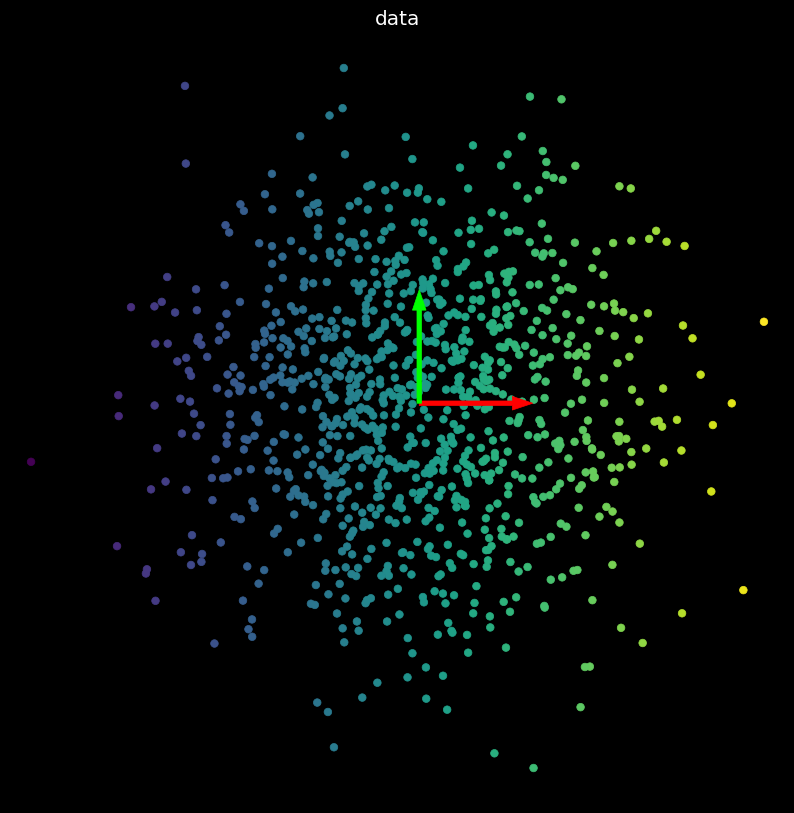

In [24]:
show_scatterplot(X, colors, title='data')
plot_bases(OI)

In [34]:
# Define transformation matrix
# W = torch.randn(2, 2)
# W

angle = -torch.tensor(0.5 * 3.14)
W = torch.tensor(
    [[torch.cos(angle), -torch.sin(angle)],
     [torch.sin(angle), torch.cos(angle)]]
)

In [35]:
W

tensor([[ 7.9627e-04,  1.0000e+00],
        [-1.0000e+00,  7.9627e-04]])

In [36]:
# Transform !
Y = X @ W
new_OI = OI @ W

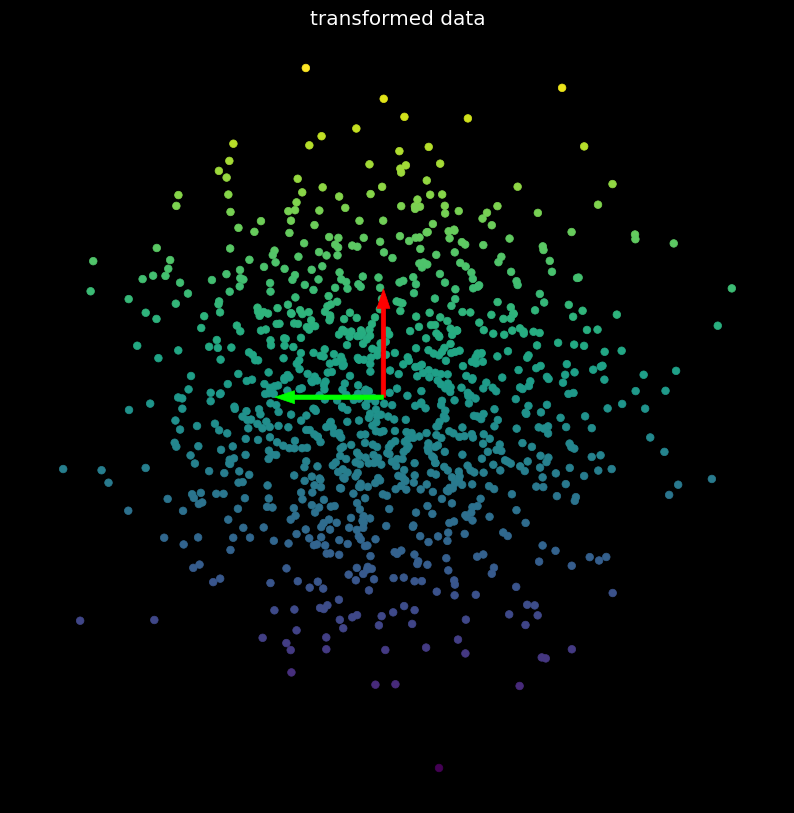

In [37]:
show_scatterplot(Y, colors, title='transformed data')
plot_bases(new_OI)

### Visualize Linear Transformation

- Generate a random matrix $W$
$$W = U \begin{bmatrix} 
s1 & 0 \\
0 & s2
\end{bmatrix} V^{\top}$$

### Linear Transformation with nn module

$\mathbf{y} = \mathbf{W} \mathbf{x}$

In [38]:
import torch.nn as nn

In [44]:
# define linear model
# model = nn.Sequential(
#     nn.Linear(2, 2, bias=False)
# )

class LinearModel(nn.Module):
    def __init__(self):
        super(LinearModel, self).__init__()
        self.linear = nn.Linear(2, 2, bias=False)

    def forward(self, x):
        return self.linear(x)

model = LinearModel()
model = model.to(device)

In [45]:
# inference
with torch.no_grad():
    Y2 = model(X)
    new_OI2 = model(OI)

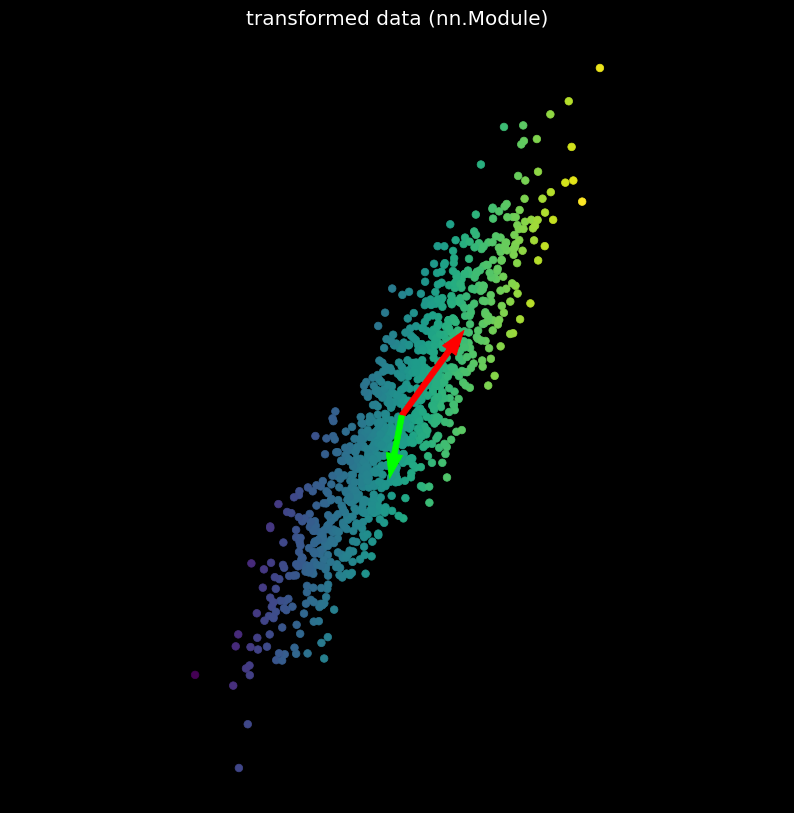

In [46]:
show_scatterplot(Y2, colors, title='transformed data (nn.Module)')
plot_bases(new_OI2)

### Non-linear Transformation

$\mathbf{y} = g(\mathbf{W} \mathbf{x})$

In [51]:
class NonlinearModel(nn.Module):
    def __init__(self):
        super(NonlinearModel, self).__init__()
        self.linear = nn.Linear(2, 2, bias=False)

    def forward(self, x):
        x = self.linear(x)
        x = torch.relu(x)
        return x
    
# define non-linear model
model = NonlinearModel()
model.to(device)

NonlinearModel(
  (linear): Linear(in_features=2, out_features=2, bias=False)
)

In [52]:
# inference
with torch.no_grad():
    Y2 = model(X)
    new_OI2 = model(OI)

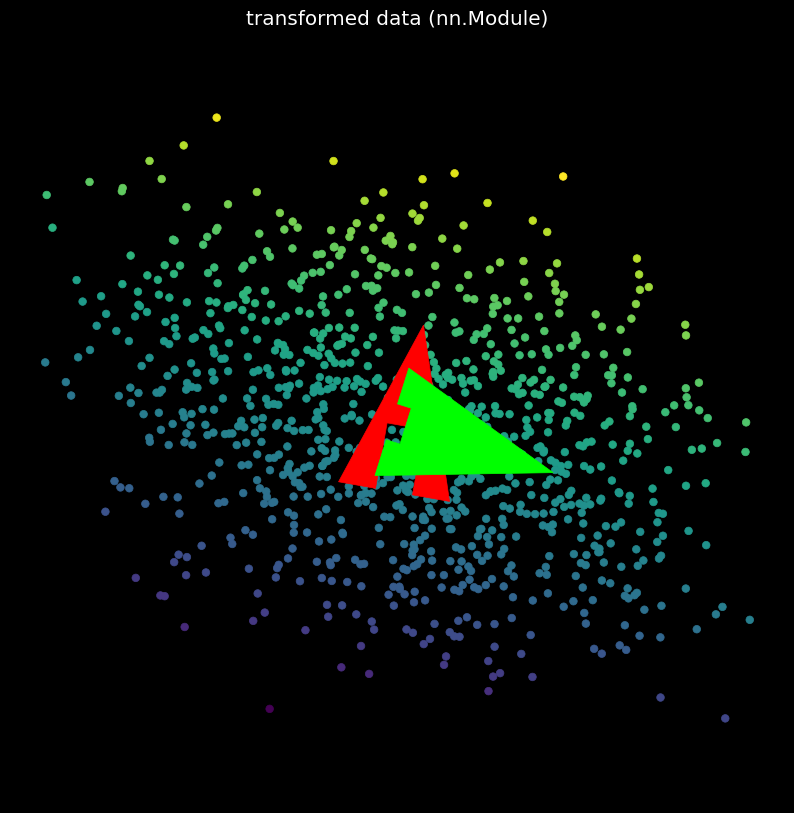

In [53]:
show_scatterplot(Y2, colors, title='transformed data (nn.Module)')
plot_bases(new_OI2)

In [15]:
# # scaling transform
# s = 5
# W = s * torch.eye(2)
# model[0].weight.data.copy_(W)

In [48]:
for s in range(2, 6):
    W = s * torch.eye(2)
    # model[0].weight.data.copy_(W)

    # inference
    with torch.no_grad():
        Y3 = model(X)
        new_OI3 = model(OI)

    show_scatterplot(Y3, colors, title='nonlinear transformation (scaling factor: %d)' % s)
    plot_bases(new_OI3)

TypeError: 'NonlinearModel' object is not subscriptable